# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

In [197]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
from datetime import date

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [87]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [27]:
cursor = con.cursor()

In [33]:
sql = """
SELECT MAX(hire_date) as max_hire_date, MIN(hire_date) as min_hire_date
FROM employees
"""

In [35]:
cursor.execute(sql)

In [37]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

In [39]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [89]:
cursor = con.cursor()

In [91]:
sql = """
    SELECT s.emp_no, s.salary, s.from_date, s.to_date
    FROM salaries s
    JOIN (
        SELECT emp_no, MAX(to_date) AS max_to_date
        FROM salaries
        GROUP BY emp_no
    ) AS latest_salaries
    ON s.emp_no = latest_salaries.emp_no AND s.to_date = latest_salaries.max_to_date;
    """

In [93]:
cursor.execute(sql)

In [47]:
import pandas as pd

In [53]:
field_names = [i[0] for i in cursor.description]

In [95]:
res = pd.DataFrame(cursor.fetchall(), columns = field_names)

In [97]:
res.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [85]:
cursor.close()

True

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [111]:
res.dtypes

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object

In [203]:
comparison_date = date(9999,1,1)

In [209]:
comparison_date

datetime.date(9999, 1, 1)

In [211]:
count_9999 = (res['to_date'] == comparison_date).sum()
count_not_9999 = (res['to_date'] != comparison_date).sum()

In [213]:
print(f"Count of 'to_date' values equal to '9999-01-01': {count_9999}")
print(f"Count of 'to_date' values not equal to '9999-01-01': {count_not_9999}")

Count of 'to_date' values equal to '9999-01-01': 240124
Count of 'to_date' values not equal to '9999-01-01': 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [223]:
current_employees = res[res.to_date == comparison_date]

In [227]:
import matplotlib.pyplot as plt

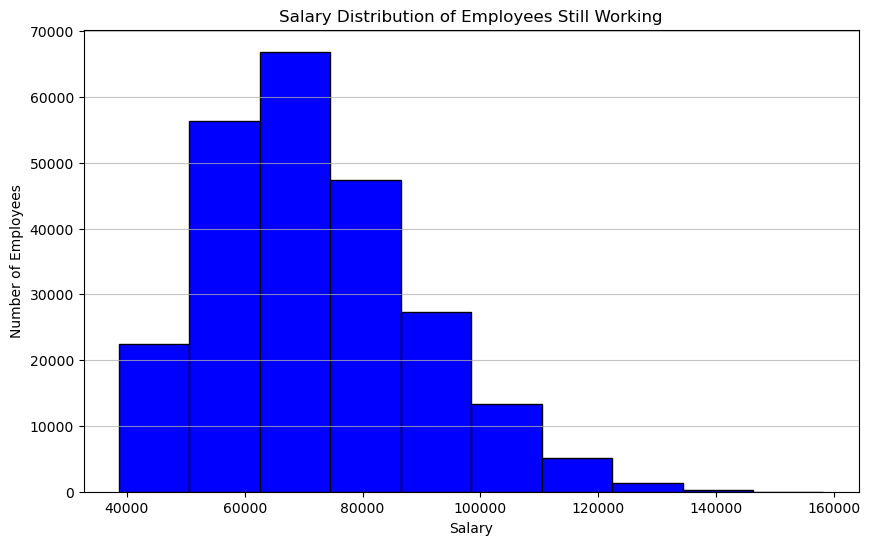

In [229]:
plt.figure(figsize=(10, 6))
plt.hist(current_employees['salary'], bins=10, color='blue', edgecolor='black')
plt.title('Salary Distribution of Employees Still Working')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.75)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [231]:
con.close()